In [1]:
import json 
import pickle

import os
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from tqdm import tqdm, notebook
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# from preprocess import feature_select, sample_generate , replace_outlier
# from scaling import standardize_select, normalize_select
# from load import dataloader

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


In [2]:
def select_columns_plot(df):
    lst=[]
    idx=0
    for i in range(5):
        df_i = df.iloc[:,i] 
        lst.append(df_i)
    
    rank_df=pd.concat(lst)
    result= rank_df.value_counts()
    result_pd= pd.DataFrame(result)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    result_plot = result_pd.plot(kind="bar",title="columns Frequency", ax=ax)

In [3]:

#feature importances1
results_fi_rf = pd.read_pickle('../cols/selected_cols1_feature_importances_rf_Ran.pkl')

#feature importances2
results_fi_ext = pd.read_pickle('../cols/selected_cols1_feature_importances_ext_Ran.pkl')

#rfe_log
results_rfe_log = pd.read_pickle('../cols/selected_cols1_rfe_log_Ran.pkl')

#rfe_dt
results_rfe_dt = pd.read_pickle('../cols/selected_cols1_rfe_dt_Ran.pkl')

#rfe_rf
results_rfe_rf = pd.read_pickle('../cols/selected_cols1_rfe_rf_Ran.pkl')

#selectkbest1
results_sk_chi2 = pd.read_pickle('../cols/selected_cols1_SelectKBest_chi2_Ran.pkl')

#selectkbest2
results_sk_f = pd.read_pickle('../cols/selected_cols1_SelectKBest_f_Ran.pkl')

#shap1
results_sh1 = pd.read_pickle('../cols/selected_cols1_shap1_Ran.pkl')

#shap2
results_sh2 = pd.read_pickle('../cols/selected_cols1_shap2_Ran.pkl')

#ensemble2
results_es2 = pd.read_pickle('../cols/selected_cols1_ensemble2_Ran.pkl')

#ensemble1
results_es = pd.read_pickle('../cols/selected_cols1_ensemble_Ran.pkl')

#regularization1
results_reglar_l1 = pd.read_pickle('../cols/selected_cols1_regularization_l1_Ran.pkl')

#regularization2
results_reglar_l2 = pd.read_pickle('../cols/selected_cols1_regularization_l2_Ran.pkl')

#regularization3
results_reglar_elasticnet = pd.read_pickle('../cols/selected_cols1_regularization_elastic_Ran.pkl')

#resampling1_weight
resampling1_weight = pd.read_pickle('../cols/selected_cols1_resampling1_weight_Ran.pkl')

In [4]:
#selectkbest1
results_sk_f

,0,1,2,3,4
0,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:1830|HGNC:3050|DSG3
1,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3852|HGNC:6442|KRT5
2,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:810|HGNC:1452|CALML3
3,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:1825|HGNC:3037|DSC3
4,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:5275|HGNC:8944|SERPINB13,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:204219|HGNC:23752|CERS3
5,ENTREZ:5275|HGNC:8944|SERPINB13,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:5275|HGNC:8944|SERPINB13,ENTREZ:5275|HGNC:8944|SERPINB13,ENTREZ:5275|HGNC:8944|SERPINB13
6,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:646|HGNC:1081|BNC1,ENTREZ:646|HGNC:1081|BNC1
7,ENTREZ:646|HGNC:1081|BNC1,ENTREZ:286887|HGNC:20406|KRT6C,ENTREZ:646|HGNC:1081|BNC1,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:9635|HGNC:2016|CLCA2
8,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:646|HGNC:1081|BNC1,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:286887|HGNC:20406|KRT6C,ENTREZ:121391|HGNC:28929|KRT74
9,ENTREZ:53637|HGNC:14299|S1PR5,ENTREZ:3854|HGNC:6444|KRT6B,ENTREZ:286887|HGNC:20406|KRT6C,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:53637|HGNC:14299|S1PR5


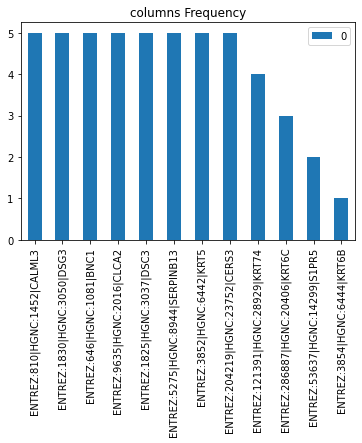

In [5]:
select_columns_plot(results_sk_f)

In [6]:
#resampling1_weight
resampling1_weight

,0,1,2,3,4
0,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:121391|HGNC:28929|KRT74
1,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:810|HGNC:1452|CALML3
2,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:1830|HGNC:3050|DSG3
3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:204219|HGNC:23752|CERS3
4,ENTREZ:128876|HGNC:16121|FAM83C,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:286887|HGNC:20406|KRT6C,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:3852|HGNC:6442|KRT5
5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:646|HGNC:1081|BNC1,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:6704|HGNC:11265|SPRR2E
6,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:2196|HGNC:3596|FAT2,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:2196|HGNC:3596|FAT2
7,ENTREZ:3854|HGNC:6444|KRT6B,ENTREZ:3854|HGNC:6444|KRT6B,ENTREZ:6704|HGNC:11265|SPRR2E,ENTREZ:387695|HGNC:31428|C10orf99,ENTREZ:1825|HGNC:3037|DSC3
8,ENTREZ:339967|HGNC:27954|TMPRSS11A,ENTREZ:389208|HGNC:29994|TMPRSS11F,ENTREZ:2196|HGNC:3596|FAT2,ENTREZ:286887|HGNC:20406|KRT6C,ENTREZ:286887|HGNC:20406|KRT6C
9,ENTREZ:6704|HGNC:11265|SPRR2E,ENTREZ:6704|HGNC:11265|SPRR2E,ENTREZ:121273|HGNC:28553|C12orf54,ENTREZ:2196|HGNC:3596|FAT2,ENTREZ:3861|HGNC:6416|KRT14


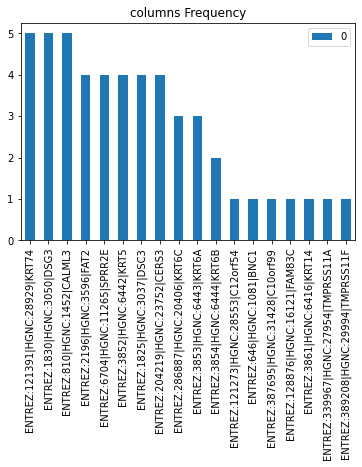

In [7]:
select_columns_plot(resampling1_weight)

In [25]:
# feature_importance randomforest
results_fi_rf

,0,1,2,3,4
0,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:483|HGNC:806|ATP1B3
1,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:144568|HGNC:23336|A2ML1
2,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:121391|HGNC:28929|KRT74
3,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:84552|HGNC:16076|PARD6G
4,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:1739|HGNC:2900|DLG1,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:810|HGNC:1452|CALML3
5,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:2196|HGNC:3596|FAT2,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:3664|HGNC:6121|IRF6
6,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:5028|HGNC:8539|P2RY1,ENTREZ:2196|HGNC:3596|FAT2,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:1739|HGNC:2900|DLG1
7,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:84552|HGNC:16076|PARD6G,ENTREZ:84552|HGNC:16076|PARD6G,ENTREZ:1739|HGNC:2900|DLG1,ENTREZ:3860|HGNC:6415|KRT13
8,ENTREZ:3382|HGNC:5343|ICA1,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:51703|HGNC:16526|ACSL5,ENTREZ:3852|HGNC:6442|KRT5
9,ENTREZ:80765|HGNC:18065|STARD5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:339967|HGNC:27954|TMPRSS11A,ENTREZ:2709|HGNC:4287|GJB5


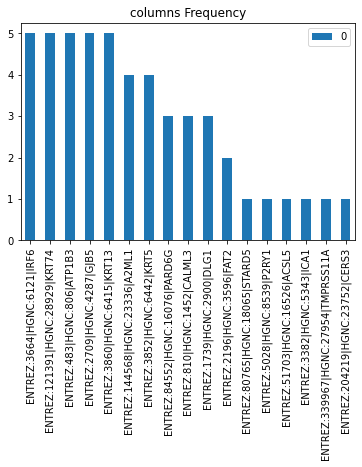

In [26]:
select_columns_plot(results_fi_rf)

In [19]:
# feature_importance extratree

results_fi_ext

,0,1,2,3,4
0,ENTREZ:6434|HGNC:10781|TRA2B,ENTREZ:6434|HGNC:10781|TRA2B,ENTREZ:6434|HGNC:10781|TRA2B,ENTREZ:6434|HGNC:10781|TRA2B,ENTREZ:1825|HGNC:3037|DSC3
1,ENTREZ:84102|HGNC:31045|SLC41A2,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:5317|HGNC:9023|PKP1,ENTREZ:5916|HGNC:9866|RARG,ENTREZ:5916|HGNC:9866|RARG
2,ENTREZ:5317|HGNC:9023|PKP1,ENTREZ:23650|HGNC:17274|TRIM29,ENTREZ:152002|HGNC:26639|XXYLT1,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:100130933|HGNC:40032|SMIM6
3,ENTREZ:54502|HGNC:30358|RBM47,ENTREZ:5916|HGNC:9866|RARG,ENTREZ:205564|HGNC:28407|SENP5,ENTREZ:100130933|HGNC:40032|SMIM6,ENTREZ:5317|HGNC:9023|PKP1
4,ENTREZ:65059|HGNC:14436|RAPH1,ENTREZ:5317|HGNC:9023|PKP1,ENTREZ:57478|HGNC:20060|USP31,ENTREZ:655|HGNC:1074|BMP7,ENTREZ:6434|HGNC:10781|TRA2B
5,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:100130933|HGNC:40032|SMIM6,ENTREZ:130589|HGNC:24063|GALM,ENTREZ:84552|HGNC:16076|PARD6G,ENTREZ:7447|HGNC:12722|VSNL1
6,ENTREZ:51195|HGNC:17428|RAPGEFL1,ENTREZ:8309|HGNC:120|ACOX2,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:84102|HGNC:31045|SLC41A2
7,ENTREZ:3728|HGNC:6207|JUP,ENTREZ:54165|HGNC:18184|DCUN1D1,ENTREZ:64768|HGNC:14645|IPPK,ENTREZ:130589|HGNC:24063|GALM,ENTREZ:84552|HGNC:16076|PARD6G
8,ENTREZ:9791|HGNC:9587|PTDSS1,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:5916|HGNC:9866|RARG,ENTREZ:3265|HGNC:5173|HRAS,ENTREZ:64065|HGNC:17637|PERP
9,ENTREZ:23607|HGNC:14258|CD2AP,ENTREZ:130589|HGNC:24063|GALM,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:64768|HGNC:14645|IPPK


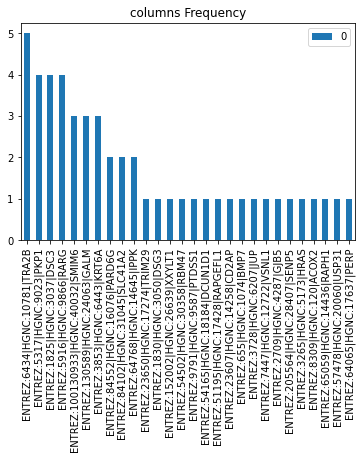

In [27]:
select_columns_plot(results_fi_ext)

In [20]:
# rfe logistic
results_rfe_log

,0,1,2,3,4
0,ENTREZ:1173|HGNC:564|AP2M1,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:8862|HGNC:16665|APLN,ENTREZ:961|HGNC:1682|CD47
1,ENTREZ:689|HGNC:1125|BTF3,ENTREZ:717|HGNC:1248|C2,ENTREZ:8751|HGNC:193|ADAM15,ENTREZ:9669|HGNC:30793|EIF5B,ENTREZ:1019|HGNC:1773|CDK4
2,ENTREZ:1364|HGNC:2046|CLDN4,ENTREZ:90993|HGNC:18856|CREB3L1,ENTREZ:81669|HGNC:20570|CCNL2,ENTREZ:2317|HGNC:3755|FLNB,ENTREZ:1362|HGNC:2301|CPD
3,ENTREZ:9669|HGNC:30793|EIF5B,ENTREZ:1717|HGNC:2860|DHCR7,ENTREZ:1717|HGNC:2860|DHCR7,ENTREZ:2817|HGNC:4449|GPC1,ENTREZ:2017|HGNC:3338|CTTN
4,ENTREZ:3920|HGNC:6501|LAMP2,ENTREZ:9669|HGNC:30793|EIF5B,ENTREZ:9669|HGNC:30793|EIF5B,ENTREZ:3020|HGNC:4764|H3-3A,ENTREZ:10521|HGNC:2740|DDX17
5,ENTREZ:5126|HGNC:8744|PCSK2,ENTREZ:3912|HGNC:6486|LAMB1,ENTREZ:3136|HGNC:4965|HLA-H,ENTREZ:26020|HGNC:14553|LRP10,ENTREZ:1974|HGNC:3284|EIF4A2
6,ENTREZ:6233|HGNC:10417|RPS27A,ENTREZ:5126|HGNC:8744|PCSK2,ENTREZ:5126|HGNC:8744|PCSK2,ENTREZ:5126|HGNC:8744|PCSK2,ENTREZ:9669|HGNC:30793|EIF5B
7,ENTREZ:6235|HGNC:10419|RPS29,ENTREZ:5317|HGNC:9023|PKP1,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:5787|HGNC:9665|PTPRB,ENTREZ:2317|HGNC:3755|FLNB
8,ENTREZ:7035|HGNC:11760|TFPI,ENTREZ:7095|HGNC:11846|SEC62,ENTREZ:6181|HGNC:10377|RPLP2,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:6653|HGNC:11185|SORL1
9,ENTREZ:7351|HGNC:12518|UCP2,ENTREZ:8404|HGNC:11220|SPARCL1,ENTREZ:7415|HGNC:12666|VCP,ENTREZ:6235|HGNC:10419|RPS29,ENTREZ:8404|HGNC:11220|SPARCL1


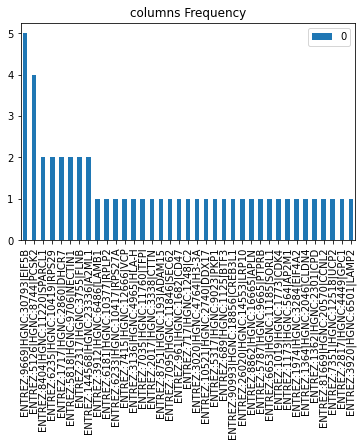

In [28]:
select_columns_plot(results_rfe_log)

In [22]:
# rfe dt
results_rfe_dt

,0,1,2,3,4
0,ENTREZ:88|HGNC:164|ACTN2,ENTREZ:645455|HGNC:28364|CEP170P1,ENTREZ:56005|HGNC:16948|MYDGF,ENTREZ:118429|HGNC:21732|ANTXR2,ENTREZ:1173|HGNC:564|AP2M1
1,ENTREZ:119032|HGNC:23516|BORCS7,ENTREZ:23268|HGNC:30373|DNMBP,ENTREZ:388743|HGNC:1485|CAPN8,ENTREZ:79946|HGNC:25880|C10orf95,ENTREZ:284185|HGNC:26816|LINC00482
2,ENTREZ:3135|HGNC:4964|HLA-G,ENTREZ:55840|HGNC:23115|EAF2,ENTREZ:51266|HGNC:24356|CLEC1B,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:3852|HGNC:6442|KRT5
3,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:348254|HGNC:29073|CCDC144CP,ENTREZ:204219|HGNC:23752|CERS3
4,ENTREZ:3931|HGNC:6522|LCAT,ENTREZ:728758|HGNC:44193|PIN4P1,ENTREZ:339535|HGNC:27924|LINC01139,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:100131726|HGNC:48658|FAM83A-AS1
5,ENTREZ:728758|HGNC:44193|PIN4P1,ENTREZ:93035|HGNC:20313|PKHD1L1,ENTREZ:728758|HGNC:44193|PIN4P1,ENTREZ:84063|HGNC:18816|KIRREL2,ENTREZ:728758|HGNC:44193|PIN4P1
6,ENTREZ:79136|HGNC:13934|LY6G6E,ENTREZ:54502|HGNC:30358|RBM47,ENTREZ:7593|HGNC:13108|MZF1,ENTREZ:728758|HGNC:44193|PIN4P1,ENTREZ:7593|HGNC:13108|MZF1
7,ENTREZ:51070|HGNC:17946|NOSIP,ENTREZ:10155|HGNC:16384|TRIM28,ENTREZ:9063|HGNC:17311|PIAS2,ENTREZ:6787|HGNC:11399|NEK4,ENTREZ:6462|HGNC:10839|SHBG
8,ENTREZ:5906|HGNC:9855|RAP1A,ENTREZ:375567|HGNC:30200|VWC2,ENTREZ:10055|HGNC:30660|SAE1,ENTREZ:54885|HGNC:24715|TBC1D8B,ENTREZ:10155|HGNC:16384|TRIM28
9,ENTREZ:159963|HGNC:28750|SLC5A12,ENTREZ:11152|HGNC:28912|WDR45,ENTREZ:7386|HGNC:12587|UQCRFS1,ENTREZ:7535|HGNC:12858|ZAP70,ENTREZ:8989|HGNC:497|TRPA1


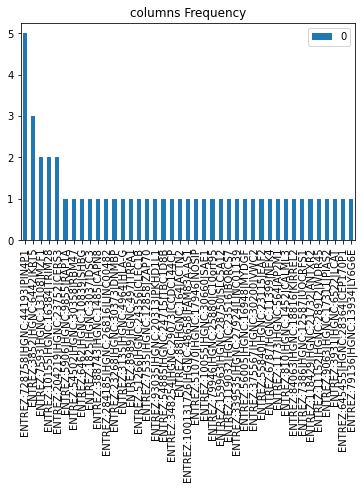

In [29]:
select_columns_plot(results_rfe_dt)

In [23]:
# rfe rf
results_rfe_rf

,0,1,2,3,4
0,ENTREZ:152002|HGNC:26639|XXYLT1,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:646|HGNC:1081|BNC1,ENTREZ:646|HGNC:1081|BNC1,ENTREZ:810|HGNC:1452|CALML3
1,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:1825|HGNC:3037|DSC3
2,ENTREZ:1475|HGNC:2481|CSTA,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:1475|HGNC:2481|CSTA,ENTREZ:1830|HGNC:3050|DSG3
3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:1475|HGNC:2481|CSTA,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:3861|HGNC:6416|KRT14
4,ENTREZ:3861|HGNC:6416|KRT14,ENTREZ:6928|HGNC:11630|HNF1B,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:1830|HGNC:3050|DSG3,ENTREZ:3852|HGNC:6442|KRT5
5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3861|HGNC:6416|KRT14,ENTREZ:3861|HGNC:6416|KRT14,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:121391|HGNC:28929|KRT74
6,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:5818|HGNC:9706|NECTIN1
7,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:53637|HGNC:14299|S1PR5
8,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:53637|HGNC:14299|S1PR5,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:6704|HGNC:11265|SPRR2E,ENTREZ:5275|HGNC:8944|SERPINB13
9,ENTREZ:53637|HGNC:14299|S1PR5,ENTREZ:8626|HGNC:15979|TP63,ENTREZ:8626|HGNC:15979|TP63,ENTREZ:339967|HGNC:27954|TMPRSS11A,ENTREZ:8626|HGNC:15979|TP63


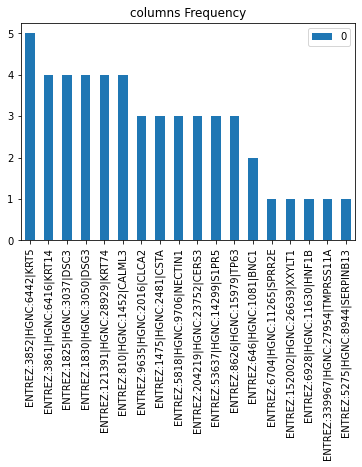

In [30]:
select_columns_plot(results_rfe_rf)

In [31]:
# ensemble1 
results_es2

,0,1,2,3,4
0,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:653145|HGNC:546|ANXA8,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:57538|HGNC:17574|ALPK3
1,ENTREZ:653145|HGNC:546|ANXA8,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:388743|HGNC:1485|CAPN8,ENTREZ:10610|HGNC:10867|ST6GALNAC2,ENTREZ:653145|HGNC:546|ANXA8
2,ENTREZ:388743|HGNC:1485|CAPN8,ENTREZ:79170|HGNC:28149|PRR15L,ENTREZ:653145|HGNC:546|ANXA8,ENTREZ:1173|HGNC:564|AP2M1,ENTREZ:6928|HGNC:11630|HNF1B
3,ENTREZ:2498|HGNC:3990|FTH1P3,ENTREZ:6641|HGNC:11168|SNTB1,ENTREZ:79170|HGNC:28149|PRR15L,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:204219|HGNC:23752|CERS3
4,ENTREZ:120224|HGNC:25194|TMEM45B,ENTREZ:27134|HGNC:11829|TJP3,ENTREZ:1173|HGNC:564|AP2M1,ENTREZ:388743|HGNC:1485|CAPN8,ENTREZ:256764|HGNC:26790|WDR72
5,ENTREZ:1173|HGNC:564|AP2M1,ENTREZ:23527|HGNC:16469|ACAP2,ENTREZ:23607|HGNC:14258|CD2AP,ENTREZ:1825|HGNC:3037|DSC3,ENTREZ:51703|HGNC:16526|ACSL5
6,ENTREZ:79616|HGNC:25876|CCNJL,ENTREZ:8745|HGNC:202|ADAM23,ENTREZ:2498|HGNC:3990|FTH1P3,ENTREZ:3963|HGNC:6568|LGALS7,ENTREZ:155465|HGNC:24167|AGR3
7,ENTREZ:634|HGNC:1814|CEACAM1,ENTREZ:221|HGNC:410|ALDH3B1,ENTREZ:53836|HGNC:4538|GPR87,ENTREZ:84102|HGNC:31045|SLC41A2,ENTREZ:1173|HGNC:564|AP2M1
8,ENTREZ:137075|HGNC:17591|CLDN23,ENTREZ:1173|HGNC:564|AP2M1,ENTREZ:3382|HGNC:5343|ICA1,ENTREZ:27324|HGNC:11972|TOX3,ENTREZ:415|HGNC:719|ARSL
9,ENTREZ:90993|HGNC:18856|CREB3L1,ENTREZ:388743|HGNC:1485|CAPN8,ENTREZ:342538|HGNC:23290|NACA2,ENTREZ:10057|HGNC:56|ABCC5,ENTREZ:121551|HGNC:23844|BTBD11


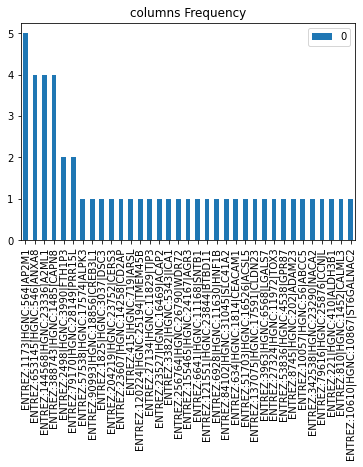

In [40]:
select_columns_plot(results_es2)

In [6]:
#ensemble1
results_es

,0,1,2,3,4
0,ENTREZ:2817|HGNC:4449|GPC1,ENTREZ:1294|HGNC:2214|COL7A1,ENTREZ:653145|HGNC:546|ANXA8,ENTREZ:1294|HGNC:2214|COL7A1,ENTREZ:653145|HGNC:546|ANXA8
1,ENTREZ:54502|HGNC:30358|RBM47,ENTREZ:7080|HGNC:11825|NKX2-1,ENTREZ:6535|HGNC:11055|SLC6A8,ENTREZ:51703|HGNC:16526|ACSL5,ENTREZ:414|HGNC:717|ARSD
2,ENTREZ:653145|HGNC:546|ANXA8,ENTREZ:653145|HGNC:546|ANXA8,ENTREZ:2817|HGNC:4449|GPC1,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:2817|HGNC:4449|GPC1
3,ENTREZ:1294|HGNC:2214|COL7A1,ENTREZ:79170|HGNC:28149|PRR15L,ENTREZ:23607|HGNC:14258|CD2AP,ENTREZ:57007|HGNC:23692|ACKR3,ENTREZ:54502|HGNC:30358|RBM47
4,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:2817|HGNC:4449|GPC1,ENTREZ:54502|HGNC:30358|RBM47,ENTREZ:2817|HGNC:4449|GPC1,ENTREZ:57007|HGNC:23692|ACKR3
5,ENTREZ:1173|HGNC:564|AP2M1,ENTREZ:93664|HGNC:16018|CADPS2,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:9791|HGNC:9587|PTDSS1,ENTREZ:810|HGNC:1452|CALML3
6,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:51703|HGNC:16526|ACSL5,ENTREZ:54502|HGNC:30358|RBM47,ENTREZ:9791|HGNC:9587|PTDSS1
7,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:5818|HGNC:9706|NECTIN1,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:653145|HGNC:546|ANXA8,ENTREZ:9635|HGNC:2016|CLCA2
8,ENTREZ:23576|HGNC:2715|DDAH1,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:1294|HGNC:2214|COL7A1,ENTREZ:2065|HGNC:3431|ERBB3,ENTREZ:51114|HGNC:18475|ZDHHC9
9,ENTREZ:6535|HGNC:11055|SLC6A8,ENTREZ:54502|HGNC:30358|RBM47,ENTREZ:79170|HGNC:28149|PRR15L,ENTREZ:9635|HGNC:2016|CLCA2,ENTREZ:23170|HGNC:28974|TTLL12


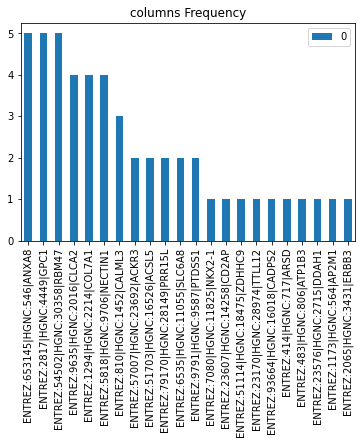

In [38]:
select_columns_plot(results_es)

In [5]:
#regularization1
results_reglar_l1

,0,1,2,3,4
0,ENTREZ:728358|HGNC:33596|DEFA1B,ENTREZ:55576|HGNC:18629|STAB2,ENTREZ:641455|HGNC:37096|POTEM,ENTREZ:55576|HGNC:18629|STAB2,ENTREZ:728358|HGNC:33596|DEFA1B
1,ENTREZ:55321|HGNC:15893|TMEM74B,ENTREZ:23430|HGNC:14118|TPSD1,ENTREZ:55576|HGNC:18629|STAB2,ENTREZ:399670|HGNC:36167|RPL13AP17,ENTREZ:342538|HGNC:23290|NACA2
2,ENTREZ:399670|HGNC:36167|RPL13AP17,ENTREZ:440073|HGNC:29193|IQSEC3,ENTREZ:399670|HGNC:36167|RPL13AP17,ENTREZ:728358|HGNC:33596|DEFA1B,ENTREZ:81027|HGNC:16257|TUBB1
3,ENTREZ:3577|HGNC:6026|CXCR1,ENTREZ:1572|HGNC:2632|CYP2F1,ENTREZ:440073|HGNC:29193|IQSEC3,ENTREZ:81027|HGNC:16257|TUBB1,ENTREZ:399670|HGNC:36167|RPL13AP17
4,ENTREZ:89858|HGNC:15482|SIGLEC12,ENTREZ:100129424|HGNC:36047|RPL19P12,ENTREZ:100129424|HGNC:36047|RPL19P12,ENTREZ:149620|HGNC:44463|CHIAP2,ENTREZ:55576|HGNC:18629|STAB2
5,ENTREZ:81027|HGNC:16257|TUBB1,ENTREZ:53828|HGNC:4028|FXYD4,ENTREZ:342538|HGNC:23290|NACA2,ENTREZ:176|HGNC:319|ACAN,ENTREZ:100129424|HGNC:36047|RPL19P12
6,ENTREZ:100129424|HGNC:36047|RPL19P12,ENTREZ:641298|HGNC:44186|SMG1P1,ENTREZ:728358|HGNC:33596|DEFA1B,ENTREZ:200010|HGNC:22146|SLC5A9,ENTREZ:56137|HGNC:8666|PCDHA12
7,ENTREZ:4856|HGNC:7885|CCN3,ENTREZ:4778|HGNC:7780|NFE2,ENTREZ:55321|HGNC:15893|TMEM74B,ENTREZ:6023|HGNC:10031|RMRP,ENTREZ:56603|HGNC:20581|CYP26B1
8,ENTREZ:342538|HGNC:23290|NACA2,ENTREZ:1511|HGNC:2532|CTSG,ENTREZ:81027|HGNC:16257|TUBB1,ENTREZ:623|HGNC:1029|BDKRB1,ENTREZ:1572|HGNC:2632|CYP2F1
9,ENTREZ:94274|HGNC:14871|PPP1R14A,ENTREZ:342538|HGNC:23290|NACA2,ENTREZ:56137|HGNC:8666|PCDHA12,ENTREZ:100129424|HGNC:36047|RPL19P12,ENTREZ:303|HGNC:538|ANXA2P1


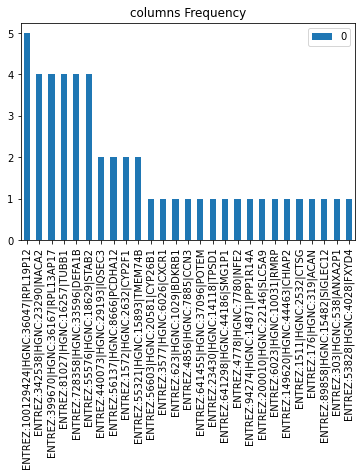

In [7]:
select_columns_plot(results_reglar_l1)

In [8]:
#regularization2
results_reglar_l2

,0,1,2,3,4
0,ENTREZ:3133|HGNC:4962|HLA-E,ENTREZ:1634|HGNC:2705|DCN,ENTREZ:117156|HGNC:18391|SCGB3A2,ENTREZ:51208|HGNC:2039|CLDN18,ENTREZ:3133|HGNC:4962|HLA-E
1,ENTREZ:1019|HGNC:1773|CDK4,ENTREZ:4629|HGNC:7569|MYH11,ENTREZ:3133|HGNC:4962|HLA-E,ENTREZ:7076|HGNC:11820|TIMP1,ENTREZ:51208|HGNC:2039|CLDN18
2,ENTREZ:3164|HGNC:7980|NR4A1,ENTREZ:3339|HGNC:5273|HSPG2,ENTREZ:23499|HGNC:13664|MACF1,ENTREZ:427|HGNC:735|ASAH1,ENTREZ:7538|HGNC:12862|ZFP36
3,ENTREZ:177|HGNC:320|AGER,ENTREZ:1490|HGNC:2500|CCN2,ENTREZ:5730|HGNC:9592|PTGDS,ENTREZ:56892|HGNC:1357|TCIM,ENTREZ:203068|HGNC:20778|TUBB
4,ENTREZ:51208|HGNC:2039|CLDN18,ENTREZ:2495|HGNC:3976|FTH1,ENTREZ:51208|HGNC:2039|CLDN18,ENTREZ:4629|HGNC:7569|MYH11,ENTREZ:5327|HGNC:9051|PLAT
5,ENTREZ:6181|HGNC:10377|RPLP2,ENTREZ:8404|HGNC:11220|SPARCL1,ENTREZ:3339|HGNC:5273|HSPG2,ENTREZ:682|HGNC:1116|BSG,ENTREZ:23499|HGNC:13664|MACF1
6,ENTREZ:1490|HGNC:2500|CCN2,ENTREZ:7296|HGNC:12437|TXNRD1,ENTREZ:6206|HGNC:10385|RPS12,ENTREZ:6194|HGNC:10429|RPS6,ENTREZ:5660|HGNC:9498|PSAP
7,ENTREZ:2317|HGNC:3755|FLNB,ENTREZ:811|HGNC:1455|CALR,ENTREZ:1510|HGNC:2530|CTSE,ENTREZ:6210|HGNC:10389|RPS15A,ENTREZ:427|HGNC:735|ASAH1
8,ENTREZ:3487|HGNC:5473|IGFBP4,ENTREZ:2920|HGNC:4603|CXCL2,ENTREZ:682|HGNC:1116|BSG,ENTREZ:2495|HGNC:3976|FTH1,ENTREZ:1490|HGNC:2500|CCN2
9,ENTREZ:427|HGNC:735|ASAH1,ENTREZ:476|HGNC:799|ATP1A1,ENTREZ:1490|HGNC:2500|CCN2,ENTREZ:10577|HGNC:14537|NPC2,ENTREZ:6678|HGNC:11219|SPARC


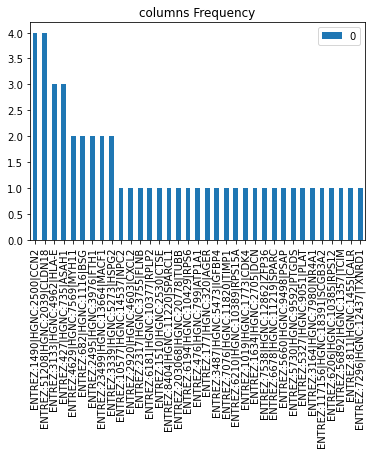

In [9]:
select_columns_plot(results_reglar_l2)

In [10]:
#regularization3
results_reglar_elasticnet

,0,1,2,3,4
0,ENTREZ:283131|HGNC:30815|NEAT1,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3852|HGNC:6442|KRT5
1,ENTREZ:3872|HGNC:6427|KRT17,ENTREZ:2495|HGNC:3976|FTH1,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:3853|HGNC:6443|KRT6A
2,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:283131|HGNC:30815|NEAT1,ENTREZ:3872|HGNC:6427|KRT17,ENTREZ:283131|HGNC:30815|NEAT1
3,ENTREZ:3853|HGNC:6443|KRT6A,ENTREZ:3872|HGNC:6427|KRT17,ENTREZ:3872|HGNC:6427|KRT17,ENTREZ:283131|HGNC:30815|NEAT1,ENTREZ:3872|HGNC:6427|KRT17
4,ENTREZ:51297|HGNC:15749|BPIFA1,ENTREZ:283131|HGNC:30815|NEAT1,ENTREZ:1356|HGNC:2295|CP,ENTREZ:2495|HGNC:3976|FTH1,ENTREZ:5660|HGNC:9498|PSAP
5,ENTREZ:9168|HGNC:11879|TMSB10,ENTREZ:9476|HGNC:13395|NAPSA,ENTREZ:51297|HGNC:15749|BPIFA1,ENTREZ:9476|HGNC:13395|NAPSA,ENTREZ:51297|HGNC:15749|BPIFA1
6,ENTREZ:476|HGNC:799|ATP1A1,ENTREZ:6035|HGNC:10044|RNASE1,ENTREZ:5284|HGNC:8968|PIGR,ENTREZ:1066|HGNC:1863|CES1,ENTREZ:4680|HGNC:1818|CEACAM6
7,ENTREZ:9476|HGNC:13395|NAPSA,ENTREZ:51297|HGNC:15749|BPIFA1,ENTREZ:9168|HGNC:11879|TMSB10,ENTREZ:7178|HGNC:12022|TPT1,ENTREZ:9168|HGNC:11879|TMSB10
8,ENTREZ:117156|HGNC:18391|SCGB3A2,ENTREZ:4233|HGNC:7029|MET,ENTREZ:1646|HGNC:385|AKR1C2,ENTREZ:6035|HGNC:10044|RNASE1,ENTREZ:9476|HGNC:13395|NAPSA
9,ENTREZ:1019|HGNC:1773|CDK4,ENTREZ:9168|HGNC:11879|TMSB10,ENTREZ:2495|HGNC:3976|FTH1,ENTREZ:3105|HGNC:4931|HLA-A,ENTREZ:7178|HGNC:12022|TPT1


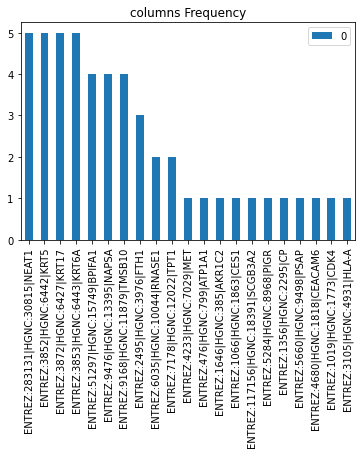

In [11]:
select_columns_plot(results_reglar_elasticnet)